In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [91]:
df = pd.read_csv('E:\\Datasets\\titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [92]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [93]:
x = df.iloc[:,0:3]

y = df.iloc[:,-1]

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [95]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [96]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [97]:
x_train['age_99'] = x_train.Age.fillna(99)

x_train['age_minus1'] = x_train.Age.fillna(-1)

In [98]:
print('The vatriance of original data is :',x_train.Age.var())
print('The vatriance of original data is :',x_train['age_99'].var())
print('The vatriance of original data is :',x_train['age_minus1'].var())

The vatriance of original data is : 204.3495133904614
The vatriance of original data is : 951.7275570187172
The vatriance of original data is : 318.0896202624484


<AxesSubplot:ylabel='Density'>

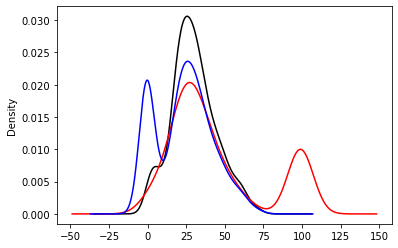

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train.Age.plot(kind='kde',color='black')

x_train.age_99.plot(kind='kde',color='red')

x_train.age_minus1.plot(kind='kde',color='blue')


In [131]:
x_train['fare_999'] =x_train['Fare'].fillna(999)

x_train['fare_minus1'] =x_train['Fare'].fillna(-1)


<AxesSubplot:ylabel='Density'>

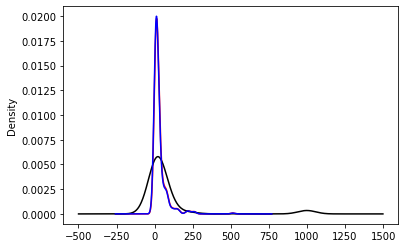

In [132]:
fig = plt.figure()

ax = fig.add_subplot(111)

x_train['Fare'].plot(kind ='kde',color='red')

x_train['fare_999'].plot(kind = 'kde',color='black')

x_train['fare_minus1'].plot(kind='kde',color = 'blue')

In [133]:
print('The variance of orginal fare column is : ',x_train.Fare.var())

print('The variance of  fare_999 column is : ',x_train.fare_999.var())

print('The variance of fare_mins1 column is : ',x_train.fare_minus1.var())

The variance of orginal fare column is :  2448.197913706318
The variance of  fare_999 column is :  47219.20265217623
The variance of fare_mins1 column is :  2378.5676784883503


In [135]:
x_train.corr()

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [145]:
imputer = SimpleImputer(strategy='constant',fill_value = 99)
imputer1 = SimpleImputer(strategy='constant',fill_value=999)

In [147]:
trf = ColumnTransformer([
    ('age_99',imputer,['Age']),
    ('fare_999',imputer1,['Fare'])
    
],remainder = 'passthrough')

In [148]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('age_99',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('fare_999',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [155]:
trf.named_transformers_['age_99'].statistics_

array([99.])

In [150]:
x_train_trf = trf.transform(x_train)
x_test_trf = trf.transform(x_test)

In [151]:
x_train_trf

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])